In [139]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns

# Question 6 -
```
Using the data from Question 3, write code to analyze the data and answer the following questions 
Note 
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities
```

In [ ]:
df = pd.read_csv("pokemon.csv")

In [141]:
df.head(2)

,Unnamed: 0,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,0.690,69,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '003', 'name': 'Venusaur'}]",NaN
1,1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,0.0,0.042,4,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"


### Get all Pokemons whose spawn rate is less than 5%

In [142]:
df[df["spawn_chance"] < 0.05]["name"].values

array(['Ivysaur', 'Venusaur', 'Charmeleon', 'Charizard', 'Wartortle',
       'Blastoise', 'Butterfree', 'Raichu', 'Sandslash', 'Nidoqueen',
       'Nidoking', 'Clefable', 'Ninetales', 'Wigglytuff', 'Vileplume',
       'Dugtrio', 'Persian', 'Primeape', 'Arcanine', 'Poliwrath',
       'Kadabra', 'Alakazam', 'Machoke', 'Machamp', 'Victreebel', 'Golem',
       'Rapidash', 'Slowbro', 'Magneton', "Farfetch'd", 'Dewgong', 'Muk',
       'Cloyster', 'Gengar', 'Electrode', 'Exeggutor', 'Marowak',
       'Hitmonlee', 'Hitmonchan', 'Lickitung', 'Weezing', 'Rhydon',
       'Chansey', 'Kangaskhan', 'Seadra', 'Starmie', 'Mr. Mime',
       'Gyarados', 'Lapras', 'Ditto', 'Vaporeon', 'Jolteon', 'Flareon',
       'Porygon', 'Omastar', 'Kabutops', 'Aerodactyl', 'Snorlax',
       'Articuno', 'Zapdos', 'Moltres', 'Dragonair', 'Dragonite',
       'Mewtwo', 'Mew'], dtype=object)

### Get all Pokemons that have less than 4 weaknesses


In [143]:
# To make list as list
df["weaknesses"] = df["weaknesses"].apply(lambda x: eval(x) if isinstance(x, str) else x)
df["length"] = df["weaknesses"].apply(len)

In [144]:
df[df["length"] < 4]["name"].values

array(['Charmander', 'Charmeleon', 'Charizard', 'Squirtle', 'Wartortle',
       'Blastoise', 'Caterpie', 'Metapod', 'Pidgey', 'Pidgeotto',
       'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow', 'Ekans',
       'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash',
       'Nidoran ♀ (Female)', 'Nidorina', 'Nidoran ♂ (Male)', 'Nidorino',
       'Clefairy', 'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff',
       'Wigglytuff', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck',
       'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine',
       'Poliwag', 'Poliwhirl', 'Abra', 'Kadabra', 'Alakazam', 'Machop',
       'Machoke', 'Machamp', 'Tentacool', 'Tentacruel', 'Ponyta',
       'Rapidash', 'Magnemite', 'Magneton', "Farfetch'd", 'Doduo',
       'Dodrio', 'Seel', 'Grimer', 'Muk', 'Shellder', 'Drowzee', 'Hypno',
       'Krabby', 'Kingler', 'Voltorb', 'Electrode', 'Cubone', 'Marowak',
       'Hitmonlee', 'Hitmonchan', 'Lickitung', 'Koffing', 'Weezing',
       'Chansey', 'Kangas

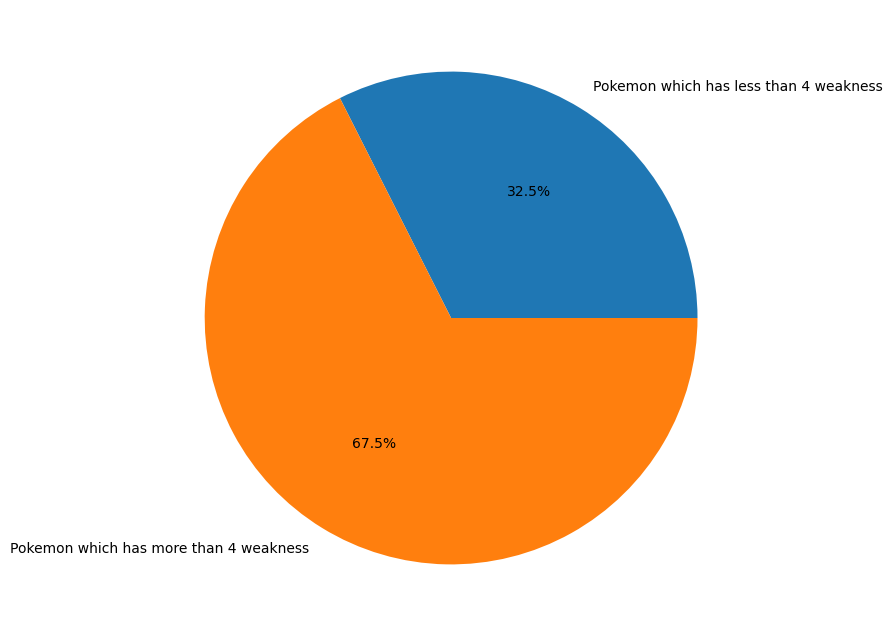

In [145]:
sizes = [(len(list(df["name"].values)))-(len(df[df["length"] < 4]["name"].values)), len(df[df["length"] < 4]["name"].values)]
labels = ['Pokemon which has less than 4 weakness', 'Pokemon which has more than 4 weakness']
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

### Get all Pokemons that have no multipliers at all

In [146]:
df[df["multipliers"].isnull()]["name"].values

array(['Venusaur', 'Charizard', 'Blastoise', 'Butterfree', 'Beedrill',
       'Pidgeot', 'Raticate', 'Fearow', 'Arbok', 'Raichu', 'Sandslash',
       'Nidoqueen', 'Nidoking', 'Clefable', 'Ninetales', 'Wigglytuff',
       'Golbat', 'Vileplume', 'Parasect', 'Venomoth', 'Dugtrio',
       'Persian', 'Golduck', 'Primeape', 'Arcanine', 'Poliwrath',
       'Alakazam', 'Machamp', 'Victreebel', 'Tentacruel', 'Golem',
       'Rapidash', 'Slowbro', 'Magneton', "Farfetch'd", 'Dodrio',
       'Dewgong', 'Muk', 'Cloyster', 'Gengar', 'Onix', 'Hypno', 'Kingler',
       'Electrode', 'Exeggutor', 'Marowak', 'Hitmonlee', 'Hitmonchan',
       'Lickitung', 'Weezing', 'Rhydon', 'Chansey', 'Tangela',
       'Kangaskhan', 'Seadra', 'Seaking', 'Starmie', 'Mr. Mime',
       'Scyther', 'Jynx', 'Electabuzz', 'Magmar', 'Pinsir', 'Tauros',
       'Gyarados', 'Lapras', 'Ditto', 'Vaporeon', 'Jolteon', 'Flareon',
       'Porygon', 'Omastar', 'Kabutops', 'Aerodactyl', 'Snorlax',
       'Articuno', 'Zapdos', 'Moltres', 

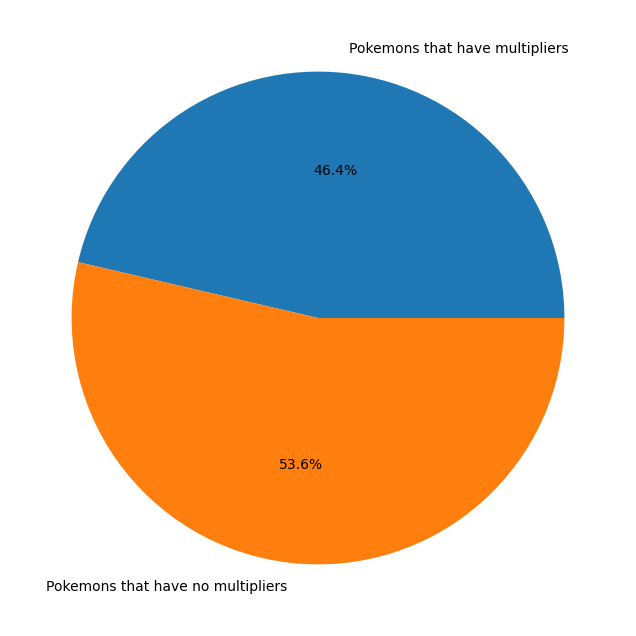

In [147]:
sizes = [(len(list(df["name"].values)))-(len(df[df["multipliers"].isnull()]["name"].values)), len(df[df["multipliers"].isnull()]["name"].values)]
labels = ['Pokemons that have multipliers', 'Pokemons that have no multipliers']
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

### Get all Pokemons that do not have more than 2 evolutions

In [148]:
df["next_evolution"] = df["next_evolution"].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [149]:
df["prev_evolution"] = df["prev_evolution"].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [150]:
df["pre_length"] = df["prev_evolution"].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [151]:
df["next_length"] = df["next_evolution"].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [152]:
df[df["next_length"] < 2]["name"].values

array(['Ivysaur', 'Venusaur', 'Charmeleon', 'Charizard', 'Wartortle',
       'Blastoise', 'Metapod', 'Butterfree', 'Kakuna', 'Beedrill',
       'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow',
       'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash',
       'Nidorina', 'Nidoqueen', 'Nidorino', 'Nidoking', 'Clefairy',
       'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff', 'Wigglytuff',
       'Zubat', 'Golbat', 'Gloom', 'Vileplume', 'Paras', 'Parasect',
       'Venonat', 'Venomoth', 'Diglett', 'Dugtrio', 'Meowth', 'Persian',
       'Psyduck', 'Golduck', 'Mankey', 'Primeape', 'Growlithe',
       'Arcanine', 'Poliwhirl', 'Poliwrath', 'Kadabra', 'Alakazam',
       'Machoke', 'Machamp', 'Weepinbell', 'Victreebel', 'Tentacool',
       'Tentacruel', 'Graveler', 'Golem', 'Ponyta', 'Rapidash',
       'Slowpoke', 'Slowbro', 'Magnemite', 'Magneton', "Farfetch'd",
       'Doduo', 'Dodrio', 'Seel', 'Dewgong', 'Grimer', 'Muk', 'Shellder',
       'Cloyster', 'Haunter

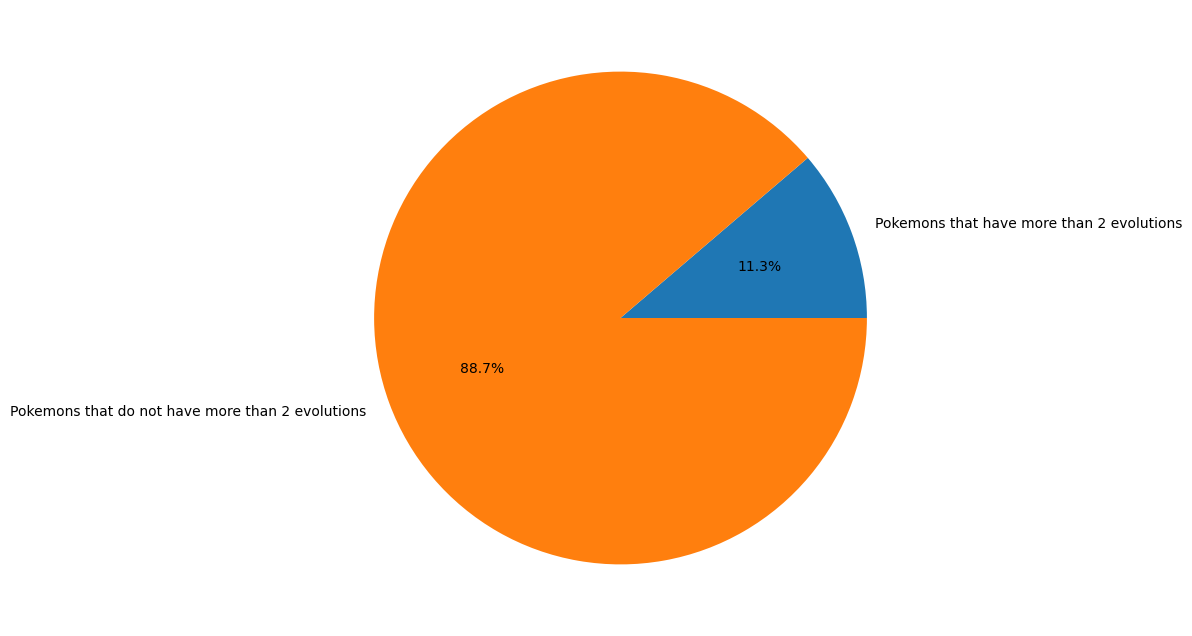

In [153]:
sizes = [(len(list(df["name"].values)))-(len(df[df["next_length"] < 2]["name"].values)), len(df[df["next_length"] < 2]["name"].values)]
labels = ['Pokemons that have more than 2 evolutions', 'Pokemons that do not have more than 2 evolutions']
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

In [154]:
df[df["pre_length"] < 2]["name"].values

array(['Bulbasaur', 'Ivysaur', 'Charmander', 'Charmeleon', 'Squirtle',
       'Wartortle', 'Caterpie', 'Metapod', 'Weedle', 'Kakuna', 'Pidgey',
       'Pidgeotto', 'Rattata', 'Raticate', 'Spearow', 'Fearow', 'Ekans',
       'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash',
       'Nidoran ♀ (Female)', 'Nidorina', 'Nidoran ♂ (Male)', 'Nidorino',
       'Clefairy', 'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff',
       'Wigglytuff', 'Zubat', 'Golbat', 'Oddish', 'Gloom', 'Paras',
       'Parasect', 'Venonat', 'Venomoth', 'Diglett', 'Dugtrio', 'Meowth',
       'Persian', 'Psyduck', 'Golduck', 'Mankey', 'Primeape', 'Growlithe',
       'Arcanine', 'Poliwag', 'Poliwhirl', 'Abra', 'Kadabra', 'Machop',
       'Machoke', 'Bellsprout', 'Weepinbell', 'Tentacool', 'Tentacruel',
       'Geodude', 'Graveler', 'Ponyta', 'Rapidash', 'Slowpoke', 'Slowbro',
       'Magnemite', 'Magneton', "Farfetch'd", 'Doduo', 'Dodrio', 'Seel',
       'Dewgong', 'Grimer', 'Muk', 'Shellder', 'Cloyster', 'Gastly',


### Get all Pokemons whose spawn time is less than 300 seconds. Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

In [155]:
# To convert minutes and seconds to seconds
df["spawn_in_sec"] = df["spawn_time"].apply(lambda x: (int(x.split(":")[0])*60)+(int(x.split(":")[1])) if isinstance(x, str) else x)

In [156]:
df[df["spawn_in_sec"]<300]["name"].values

array(['Squirtle', 'Blastoise', 'Metapod', 'Weedle', 'Kakuna', 'Beedrill',
       'Pidgey', 'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Fearow',
       'Arbok', 'Pikachu', 'Sandshrew', 'Nidoran ♀ (Female)',
       'Nidoran ♂ (Male)', 'Clefairy', 'Clefable', 'Ninetales', 'Golbat',
       'Oddish', 'Paras', 'Parasect', 'Venonat', 'Diglett', 'Meowth',
       'Persian', 'Psyduck', 'Growlithe', 'Arcanine', 'Poliwag',
       'Poliwrath', 'Abra', 'Machop', 'Machamp', 'Bellsprout',
       'Tentacool', 'Graveler', 'Ponyta', 'Rapidash', 'Slowbro',
       'Magnemite', "Farfetch'd", 'Dodrio', 'Muk', 'Cloyster', 'Gastly',
       'Haunter', 'Gengar', 'Onix', 'Drowzee', 'Hypno', 'Krabby',
       'Kingler', 'Voltorb', 'Electrode', 'Cubone', 'Marowak',
       'Hitmonlee', 'Lickitung', 'Rhyhorn', 'Chansey', 'Kangaskhan',
       'Horsea', 'Seadra', 'Goldeen', 'Mr. Mime', 'Electabuzz', 'Pinsir',
       'Tauros', 'Gyarados', 'Jolteon', 'Porygon', 'Kabuto'], dtype=object)

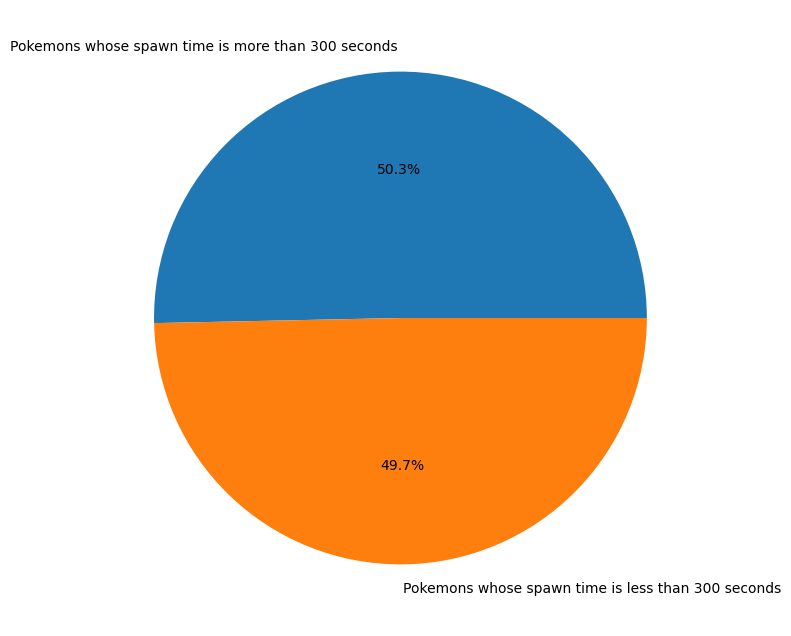

In [157]:
sizes = [(len(list(df["name"].values)))-(len(df[df["spawn_in_sec"]<300]["name"].values)), len(df[df["spawn_in_sec"]<300]["name"].values)]
labels = ['Pokemons whose spawn time is more than 300 seconds', 'Pokemons whose spawn time is less than 300 seconds']
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

### Get all Pokemon who have more than two types of capabilities

In [158]:
# I assume Here capabilities refers to the form that pokemon can change. There is no pokemon which has more 
# than 2. we have only capability which is equal to 2

In [159]:
df["type_len"] = df["type"].apply(lambda x: len(eval(x)) if isinstance(x, str) else x)

In [160]:
df[df["type_len"]>2]

,Unnamed: 0,id,num,name,img,type,height,weight,candy,candy_count,...,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,length,pre_length,next_length,spawn_in_sec,type_len


In [161]:
df[df["type_len"]==2]["name"].values

array(['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charizard', 'Butterfree',
       'Weedle', 'Kakuna', 'Beedrill', 'Pidgey', 'Pidgeotto', 'Pidgeot',
       'Spearow', 'Fearow', 'Nidoqueen', 'Nidoking', 'Zubat', 'Golbat',
       'Oddish', 'Gloom', 'Vileplume', 'Paras', 'Parasect', 'Venonat',
       'Venomoth', 'Poliwrath', 'Bellsprout', 'Weepinbell', 'Victreebel',
       'Tentacool', 'Tentacruel', 'Geodude', 'Graveler', 'Golem',
       'Slowpoke', 'Slowbro', "Farfetch'd", 'Doduo', 'Dodrio', 'Dewgong',
       'Cloyster', 'Gastly', 'Haunter', 'Gengar', 'Onix', 'Exeggcute',
       'Exeggutor', 'Rhyhorn', 'Rhydon', 'Starmie', 'Scyther', 'Jynx',
       'Gyarados', 'Lapras', 'Omanyte', 'Omastar', 'Kabuto', 'Kabutops',
       'Aerodactyl', 'Articuno', 'Zapdos', 'Moltres', 'Dragonite'],
      dtype=object)